# Introduction to Importing Data in Python
Run the hidden code cell below to import the data used in this course.

In [4]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import h5py
from sas7bdat import SAS7BDAT
from sqlalchemy import create_engine
import pickle

# Import the course datasets
titanic = pd.read_csv("datasets/titanic_sub.csv")
battledeath_2002 = pd.ExcelFile("datasets/battledeath.xlsx").parse("2002")
engine = create_engine('sqlite:///datasets/Chinook.sqlite')
con = engine.connect()
rs = con.execute('SELECT * FROM Album')
chinook = pd.DataFrame(rs.fetchall())
seaslug = np.loadtxt("datasets/seaslug.txt", delimiter="\t", dtype=str)

## Explore Datasets
Try importing the remaining files to explore the data and practice your skills!
- `datasets/disarea.dta`
- `datasets/ja_data2.mat`
- `datasets/L-L1_LOSC_4_V1-1126259446-32.hdf5`
- `datasets/mnist_kaggle_some_rows.csv`
- `datasets/sales.sas7bdat`

## Chapter 1

### .txt line by line 

In [ ]:
# Read & print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

### importing text files 

In [ ]:
# Open a file: file
file = open('moby_dick.txt' , 'r' )

# Print i
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)


### Using Numpy to import flat file 

In [ ]:
# Import package
import numpy as np

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


### Numpy import 

In [ ]:
# Import numpy
import numpy as np

# Assign the filename: file
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0, 2])

# Print data
print(data)

### Importing differet data types

In [ ]:
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype= float, skiprows=1)
# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


### .recfromcsv()

In [ ]:
# Assign the filename: file
file = 'titanic.csv'

# Import file using np.recfromcsv: d
d= np.recfromcsv(file, delimiter=',', names= True, dtype= None)

# Print out first three entries of d
print(d[:3])

### .genfromtxt()

In [12]:
import numpy as np 
data = np.genfromtxt('datasets/mnist_kaggle_some_rows.csv', delimiter=',', names=True, dtype=None)


### Customizing pandas import 

In [ ]:
# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data=  pd.read_csv(file,nrows=5 , header= None)

# Build a numpy array from the DataFrame: data_array
data_array= np.array(data)

# Print the datatype of data_array to the shell
print(type(data_array))

In [ ]:
# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()


## Chapter 2

### Importing a pickled file

In [ ]:
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

### Listing sheets in excel files

In [ ]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)


### Customizing spreadsheet import 

In [ ]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows= [0], names=["Country", "AAM due to War (2002)"])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(0, usecols=["Country"], skiprows=1, names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

### Importing SAS file

In [ ]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas= file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

### Importing Stata file to histogram

  wbcode               country  disa1  disa2  ...  disa22  disa23  disa24  disa25
0    AFG           Afghanistan   0.00   0.00  ...    0.00    0.02    0.00    0.00
1    AGO                Angola   0.32   0.02  ...    0.99    0.98    0.61    0.00
2    ALB               Albania   0.00   0.00  ...    0.00    0.00    0.00    0.16
3    ARE  United Arab Emirates   0.00   0.00  ...    0.00    0.00    0.00    0.00
4    ARG             Argentina   0.00   0.24  ...    0.00    0.01    0.00    0.11

[5 rows x 27 columns]


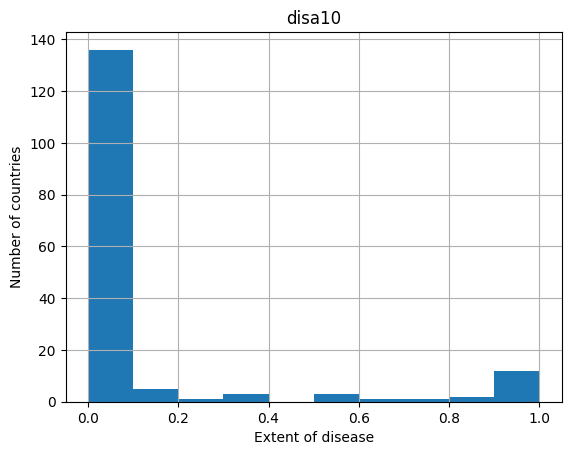

In [4]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

# Load Stata file into a pandas DataFrame: df
df= pd.read_stata('datasets/disarea.dta')

# Print the head of the DataFrame df

print(df.head())
# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

### HDF5 files importing

In [ ]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file= 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

In [ ]:
# Get the HDF5 group: group
group= data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain=np.array(data['strain']['Strain'])

# Set number of time points to sample: num_samples
num_samples= 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


### Loading .mat file 

In [ ]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat= scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

### The structure of .mat in Python

In [ ]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()


## Chapter 3


### database engine

In [ ]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine= create_engine("sqlite:///Chinook.sqlite")

In [ ]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine= create_engine("sqlite:///Chinook.sqlite")

# Save the table names to a list: table_names
table_names= engine.table_names()

# Print the table names to the shell
print(table_names)

### SQL query

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con= engine.connect()
# Perform query: rs
rs = con.execute("SELECT *  FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs)

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

### another way to type 

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

### fetchall and where SQL

In [ ]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >=6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

### Order by 

In [ ]:
# Create engine: engine
engine= create_engine("sqlite:///Chinook.sqlite")

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
df.columns= rs.keys()

# Print head of DataFrame
print(df.head())

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine= create_engine("sqlite:///Chinook.sqlite")

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

### Using pandas for complex querying

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine= create_engine("sqlite:///Chinook.sqlite")

# Execute query and store records in DataFrame: df
df= pd.read_sql_query("SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate", engine)

# Print head of DataFrame
print(df.head())

### Inner Join

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df= pd.DataFrame(rs.fetchall())
    df.columns= rs.keys()

# Print head of DataFrame df
print(df.head())

### Filtering INNER JOIN

In [ ]:
# Execute query and store records in DataFrame: df
df= pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000 ", engine)

# Print head of DataFrame
print(df.head())